In [1]:
library(rcompanion)
library(MASS)
library(mgcv)
library(classInt)
library(RColorBrewer)
library(rgdal)
library(ggplot2)
library(cluster)
library(spgwr)
library(maptools)
library(GWmodel)
library(e1071)

Loading required package: nlme
This is mgcv 1.8-23. For overview type 'help("mgcv-package")'.
Loading required package: spData
To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source'))`
Loading required package: sp
rgdal: version: 1.2-18, (SVN revision 718)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.3, released 2017/20/01
 Path to GDAL shared files: /Library/Frameworks/R.framework/Versions/3.4/Resources/library/rgdal/gdal
 GDAL binary built with GEOS: FALSE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: /Library/Frameworks/R.framework/Versions/3.4/Resources/library/rgdal/proj
 Linking to sp version: 1.2-7 
Package 'mclust' version 5.4.2
Type 'citation("mclust")' for citing this R package in publications.

Attaching package: ‘mclust’

The following object is mask

In [2]:
ROOT <- '/Users/dongmeichen/Documents/beetle'
DATA <- sprintf('%s/data', ROOT)
data <- read.csv(sprintf('%s/mpb10km_data_wo_FIA.csv', DATA))
head(data)

lon,lat,etopo1,beetleAcres,host,forest,mStdAge,density,vcc,mfri,⋯,Tmin,winterMin,summerTmean,Pmean,summerP1,minT,JanMin,TOctSep,Jan20,PcumOctSep
-124.1712,40.22942,365.1772,0.80,1,1,25.50000,58050.83,1,2,⋯,3.799283,-1.050936,13.39157,147.6052,24.63396,-1.142272,0.77218069,10.28896,0,3588.627
-124.0860,40.42007,493.0852,0.80,0,1,42.46217,52809.04,1,2,⋯,3.858750,-1.872970,14.15700,136.2772,25.59386,-1.986082,-0.02538966,10.65948,0,3310.186
-123.9379,40.25447,487.5240,0.80,1,1,169.82977,54385.98,1,2,⋯,3.853568,-2.322706,15.26891,131.7037,22.97331,-2.402099,-0.42077545,11.30121,0,3203.155
-123.9535,40.34353,350.6961,0.80,0,1,249.11995,47005.25,1,2,⋯,4.731104,-2.289419,15.96638,127.5623,21.96572,-2.376570,-0.38369531,12.05334,0,3101.846
-124.2945,42.21193,387.5008,2.10,1,1,102.39621,51167.16,3,2,⋯,3.569939,-1.609584,14.75741,144.9382,63.31930,-1.701227,0.26865842,10.65064,0,3508.975
-124.3114,42.30082,409.5534,331.05,1,1,83.12288,54697.57,3,2,⋯,2.772311,-1.861916,14.02822,145.8606,65.28476,-1.954968,0.04758294,9.89128,0,3531.298


In [3]:
dim(data)
colnames(data)

[1] 7636   50

[1] "lon"         "lat"         "etopo1"      "beetleAcres" "host"       
 [6] "forest"      "mStdAge"     "density"     "vcc"         "mfri"       
[11] "prs"         "pms"         "pls"         "GAP1"        "GAP2"       
[16] "GAP3"        "vpd"         "cwd"         "maxAugT"     "summerP0"   
[21] "Tmean"       "mi"          "Tvar"        "wd"          "AugTmean"   
[26] "OctTmin"     "AugMaxT"     "AugTmax"     "Acs"         "MarMin"     
[31] "ddAugJun"    "ddAugJul"    "JanTmin"     "PPT"         "summerP2"   
[36] "TMarAug"     "Mar20"       "fallTmean"   "MarTmin"     "maxT"       
[41] "Tmin"        "winterMin"   "summerTmean" "Pmean"       "summerP1"   
[46] "minT"        "JanMin"      "TOctSep"     "Jan20"       "PcumOctSep"

In [4]:
drop <- c('summerP1')
data <- data[, -which(names(data) %in% drop)]
mod <- lm(beetleAcres^0.05 ~ ., data=data)

In [5]:
summary(mod)


Call:
lm(formula = beetleAcres^0.05 ~ ., data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43787 -0.07011  0.00628  0.07382  0.45600 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.816e-01  1.915e-01   1.471 0.141421    
lon         -2.676e-03  1.370e-03  -1.953 0.050849 .  
lat          1.012e-02  2.532e-03   3.996 6.50e-05 ***
etopo1       1.222e-04  8.622e-06  14.174  < 2e-16 ***
host         4.914e-02  5.789e-03   8.489  < 2e-16 ***
forest       1.292e-02  2.743e-03   4.711 2.51e-06 ***
mStdAge      1.714e-05  2.640e-05   0.649 0.516172    
density      1.148e-06  9.085e-08  12.635  < 2e-16 ***
vcc          4.246e-03  1.422e-03   2.986 0.002840 ** 
mfri         2.821e-04  3.262e-04   0.865 0.387203    
prs         -1.013e-03  4.355e-04  -2.327 0.020014 *  
pms         -2.045e-04  4.725e-04  -0.433 0.665138    
pls         -1.608e-04  4.536e-04  -0.354 0.723006    
GAP1        -2.693e-02  4.144e-03  -6.500 8.56e-11 ***
G

In [6]:
mod.r <- step(mod, trace=0)

In [7]:
summary(mod.r)


Call:
lm(formula = beetleAcres^0.05 ~ lon + lat + etopo1 + host + forest + 
    density + vcc + prs + GAP1 + GAP3 + vpd + cwd + maxAugT + 
    summerP0 + Tmean + mi + Tvar + wd + AugTmean + OctTmin + 
    AugMaxT + AugTmax + Acs + MarMin + ddAugJun + ddAugJul + 
    JanTmin + PPT + TMarAug + Mar20 + fallTmean + MarTmin + maxT + 
    Tmin + winterMin + summerTmean + Pmean + minT + JanMin + 
    TOctSep + PcumOctSep, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43982 -0.06952  0.00631  0.07425  0.45296 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.999e-01  1.781e-01   1.684 0.092259 .  
lon         -2.585e-03  1.292e-03  -2.001 0.045395 *  
lat          1.016e-02  2.499e-03   4.064 4.88e-05 ***
etopo1       1.220e-04  8.406e-06  14.510  < 2e-16 ***
host         4.891e-02  5.784e-03   8.457  < 2e-16 ***
forest       1.289e-02  2.738e-03   4.709 2.53e-06 ***
density      1.151e-06  9.061e-08  12.702  < 2e-16 ***
vcc     

In [9]:
resids <- residuals(mod.r)
colours <- brewer.pal(4,"Set1")

In [10]:
xy <- read.csv(sprintf('%s/mpb10km_data_wo_FIA_xy.csv', DATA))

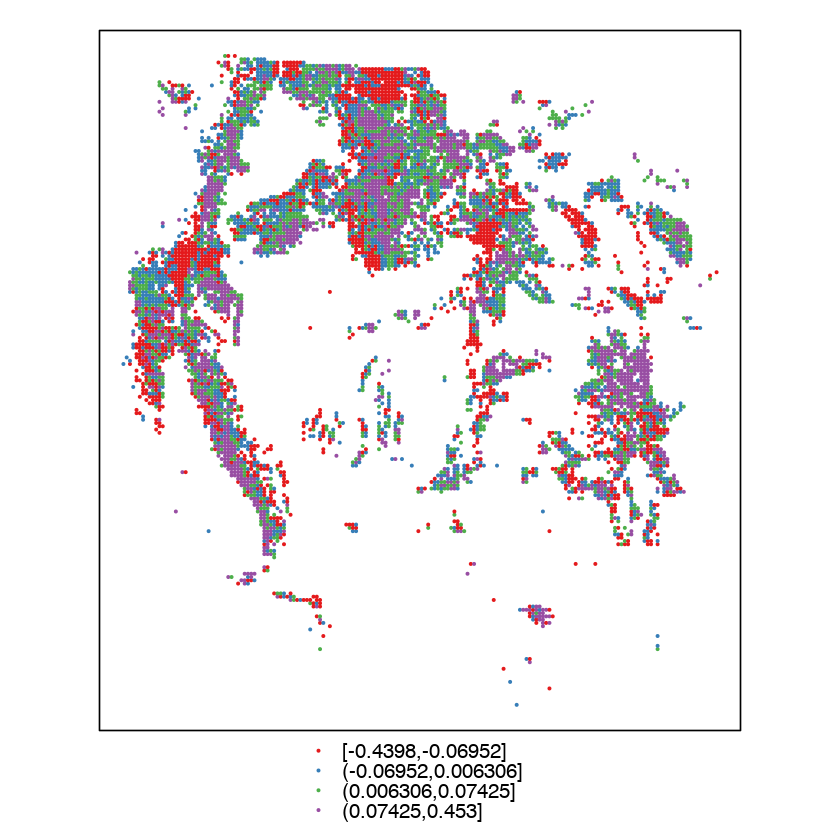

In [11]:
map.resids <- SpatialPointsDataFrame(data=data.frame(resids), coords=cbind(xy$x,xy$y)) 
spplot(map.resids, cuts=quantile(resids), col.regions=colours, cex=0.3) 

In [12]:
ptm <- proc.time()
GWRbandwidth <- gwr.sel(beetleAcres^0.05 ~ lon + lat + etopo1 + host + forest + 
    density + vcc + prs + GAP1 + GAP3 + vpd + cwd + maxAugT + 
    summerP0 + Tmean + mi + Tvar + wd + AugTmean + OctTmin + 
    AugMaxT + AugTmax + Acs + MarMin + ddAugJun + ddAugJul + 
    JanTmin + PPT + TMarAug + Mar20 + fallTmean + MarTmin + maxT + 
    Tmin + winterMin + summerTmean + Pmean + minT + JanMin + 
    TOctSep + PcumOctSep, data=data, coords=cbind(xy$x,xy$y), adapt=T)
proc.time() - ptm

Adaptive q: 0.381966 CV score: 78.62773 
Adaptive q: 0.618034 CV score: 82.16703 
Adaptive q: 0.236068 CV score: 73.9546 
Adaptive q: 0.145898 CV score: 68.29278 
Adaptive q: 0.09016994 CV score: 62.6076 
Adaptive q: 0.05572809 CV score: 57.18496 
Adaptive q: 0.03444185 CV score: 53.00949 
Adaptive q: 0.02128624 CV score: 49.93146 
Adaptive q: 0.01315562 CV score: 48.19359 
Adaptive q: 0.008130619 CV score: 47.45885 
Adaptive q: 0.005024999 CV score: NA 


Warning message in optimize(gwr.cv.adapt.f, lower = beta1, upper = beta2, maximum = FALSE, :
“NA/Inf replaced by maximum positive value”

Adaptive q: 0.01005 CV score: 47.6224 
Adaptive q: 0.006921259 CV score: NA 


Warning message in optimize(gwr.cv.adapt.f, lower = beta1, upper = beta2, maximum = FALSE, :
“NA/Inf replaced by maximum positive value”

Adaptive q: 0.008863756 CV score: 47.48743 
Adaptive q: 0.007996812 CV score: NA 


Warning message in optimize(gwr.cv.adapt.f, lower = beta1, upper = beta2, maximum = FALSE, :
“NA/Inf replaced by maximum positive value”

Adaptive q: 0.008171309 CV score: 47.44481 
Adaptive q: 0.0084358 CV score: 47.41748 
Adaptive q: 0.008368769 CV score: 47.41552 
Adaptive q: 0.008328079 CV score: 47.42033 
Adaptive q: 0.008368769 CV score: 47.41552 


    user   system  elapsed 
4126.963  161.131 4402.885 

In [13]:
ptm <- proc.time()
gwr.model <- gwr(beetleAcres^0.05 ~ lon + lat + etopo1 + host + forest + 
    density + vcc + prs + GAP1 + GAP3 + vpd + cwd + maxAugT + 
    summerP0 + Tmean + mi + Tvar + wd + AugTmean + OctTmin + 
    AugMaxT + AugTmax + Acs + MarMin + ddAugJun + ddAugJul + 
    JanTmin + PPT + TMarAug + Mar20 + fallTmean + MarTmin + maxT + 
    Tmin + winterMin + summerTmean + Pmean + minT + JanMin + 
    TOctSep + PcumOctSep, data=data, coords=cbind(xy$x, xy$y), adapt=GWRbandwidth, 
                hatmatrix=TRUE, se.fit=TRUE)
proc.time() - ptm

     user    system   elapsed 
19249.040  2925.127 22265.304 

In [14]:
results <- as.data.frame(gwr.model$SDF)
head(results)

sum.w,X.Intercept.,lon,lat,etopo1,host,forest,density,vcc,prs,⋯,winterMin_se_EDF,summerTmean_se_EDF,Pmean_se_EDF,minT_se_EDF,JanMin_se_EDF,TOctSep_se_EDF,PcumOctSep_se_EDF,pred.se.1,coord.x,coord.y
136.0645,-20.752239,-0.11903995,0.1354327,1.541748e-04,-0.06196741,0.032240067,-5.201852e-07,-0.005699180,0.0014235779,⋯,0.1274242,0.3251778,0.09231181,0.1285455,0.03713473,10.14342,0.005189711,0.05182107,-990000,-460000
133.5456,-23.589253,-0.13630220,0.1425799,1.496557e-04,-0.06548325,0.034860643,-4.609842e-07,-0.005233793,0.0018511448,⋯,0.1378806,0.3563506,0.10187559,0.1380557,0.03904125,11.17320,0.005720079,0.03821353,-980000,-440000
121.0244,-26.430439,-0.15435076,0.1484172,1.749717e-04,-0.06768145,0.032341818,-8.869295e-07,-0.008465171,0.0018293771,⋯,0.1569016,0.3850391,0.11429406,0.1584520,0.04606638,13.09288,0.006543177,0.03562997,-970000,-460000
125.0884,-25.854524,-0.15090025,0.1447157,1.658476e-04,-0.06810684,0.033990680,-7.264692e-07,-0.007444900,0.0019367092,⋯,0.1535929,0.3841759,0.11309910,0.1543526,0.04449767,12.62488,0.006437184,0.04035965,-970000,-450000
112.5545,-3.095264,0.04475106,0.2401097,7.961380e-05,0.01267380,0.003319291,-5.498453e-08,0.002026209,-0.0008959302,⋯,0.1544451,0.5867348,0.29855800,0.1349141,0.04639966,16.44587,0.014843992,0.03365616,-970000,-240000
110.9434,-6.222201,0.01362021,0.2247442,7.579213e-05,0.01440381,0.003150566,-1.363475e-07,0.001297780,-0.0007688417,⋯,0.1590573,0.5989362,0.31415642,0.1352777,0.04923289,16.79611,0.015492631,0.03681334,-970000,-230000


In [15]:
colnames(results)

[1] "sum.w"               "X.Intercept."        "lon"                
  [4] "lat"                 "etopo1"              "host"               
  [7] "forest"              "density"             "vcc"                
 [10] "prs"                 "GAP1"                "GAP3"               
 [13] "vpd"                 "cwd"                 "maxAugT"            
 [16] "summerP0"            "Tmean"               "mi"                 
 [19] "Tvar"                "wd"                  "AugTmean"           
 [22] "OctTmin"             "AugMaxT"             "AugTmax"            
 [25] "Acs"                 "MarMin"              "ddAugJun"           
 [28] "ddAugJul"            "JanTmin"             "PPT"                
 [31] "TMarAug"             "Mar20"               "fallTmean"          
 [34] "MarTmin"             "maxT"                "Tmin"               
 [37] "winterMin"           "summerTmean"         "Pmean"              
 [40] "minT"                "JanMin"              "TOctSep"            
 [43] "PcumOctSep"          "X.Intercept._se"     "lon_se"             
 [46] "lat_se"              "etopo1_se"           "host_se"            
 [49] "forest_se"           "density_se"          "vcc_se"             
 [52] "prs_se"              "GAP1_se"             "GAP3_se"            
 [55] "vpd_se"              "cwd_se"              "maxAugT_se"         
 [58] "summerP0_se"         "Tmean_se"            "mi_se"              
 [61] "Tvar_se"             "wd_se"               "AugTmean_se"        
 [64] "OctTmin_se"          "AugMaxT_se"          "AugTmax_se"         
 [67] "Acs_se"              "MarMin_se"           "ddAugJun_se"        
 [70] "ddAugJul_se"         "JanTmin_se"          "PPT_se"             
 [73] "TMarAug_se"          "Mar20_se"            "fallTmean_se"       
 [76] "MarTmin_se"          "maxT_se"             "Tmin_se"            
 [79] "winterMin_se"        "summerTmean_se"      "Pmean_se"           
 [82] "minT_se"             "JanMin_se"           "TOctSep_se"         
 [85] "PcumOctSep_se"       "gwr.e"               "pred"               
 [88] "pred.se"             "localR2"             "X.Intercept._se_EDF"
 [91] "lon_se_EDF"          "lat_se_EDF"          "etopo1_se_EDF"      
 [94] "host_se_EDF"         "forest_se_EDF"       "density_se_EDF"     
 [97] "vcc_se_EDF"          "prs_se_EDF"          "GAP1_se_EDF"        
[100] "GAP3_se_EDF"         "vpd_se_EDF"          "cwd_se_EDF"         
[103] "maxAugT_se_EDF"      "summerP0_se_EDF"     "Tmean_se_EDF"       
[106] "mi_se_EDF"           "Tvar_se_EDF"         "wd_se_EDF"          
[109] "AugTmean_se_EDF"     "OctTmin_se_EDF"      "AugMaxT_se_EDF"     
[112] "AugTmax_se_EDF"      "Acs_se_EDF"          "MarMin_se_EDF"      
[115] "ddAugJun_se_EDF"     "ddAugJul_se_EDF"     "JanTmin_se_EDF"     
[118] "PPT_se_EDF"          "TMarAug_se_EDF"      "Mar20_se_EDF"       
[121] "fallTmean_se_EDF"    "MarTmin_se_EDF"      "maxT_se_EDF"        
[124] "Tmin_se_EDF"         "winterMin_se_EDF"    "summerTmean_se_EDF" 
[127] "Pmean_se_EDF"        "minT_se_EDF"         "JanMin_se_EDF"      
[130] "TOctSep_se_EDF"      "PcumOctSep_se_EDF"   "pred.se.1"          
[133] "coord.x"             "coord.y"

In [18]:
coeffs <- results[, colnames(results)[colnames(results) %in% colnames(data)]]

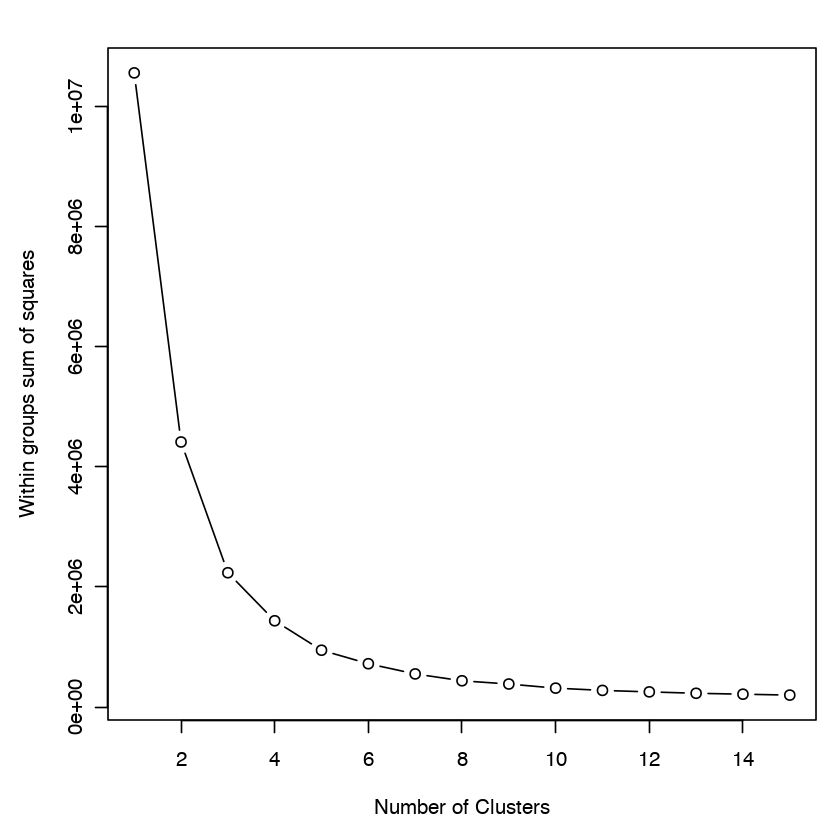

In [19]:
wss <- (nrow(coeffs)-1)*sum(apply(coeffs,2,var))
par(mfrow=c(1,1),mar=c(5,4.5,2,1))
for (i in 2:15) wss[i] <- sum(kmeans(coeffs, centers=i)$withinss)
plot(1:15, wss, type="b", xlab="Number of Clusters",
     ylab="Within groups sum of squares") 

In [20]:
ncluster <- 3

In [21]:
fit <- kmeans(coeffs, ncluster)

In [22]:
nclr <- ncluster
plotclr <- brewer.pal(nclr,"Set1")

In [23]:
mpb10km_poly <- readOGR(dsn='/Users/dongmeichen/Documents/beetle/shp', 
                           layer='mpb10km')
mpb_projstr <- "+proj=laea +lon_0=-112.5 +lat_0=45 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
proj4string(mpb10km_poly) <- mpb_projstr
mpb10km_lines <- fortify(mpb10km_poly, region="SP_ID")

OGR data source with driver: ESRI Shapefile 
Source: "/Users/dongmeichen/Documents/beetle/shp", layer: "mpb10km"
with 17 features
It has 2 fields


Warning message in ReplProj4string(obj, CRS(value)):
“A new CRS was assigned to an object with an existing CRS:
+proj=laea +lat_0=45 +lon_0=-112.5 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0
without reprojecting.
For reprojection, use function spTransform”

In [24]:
data.gwr <- cbind(data, xy)

Warning message:
“Non Lab interpolation is deprecated”

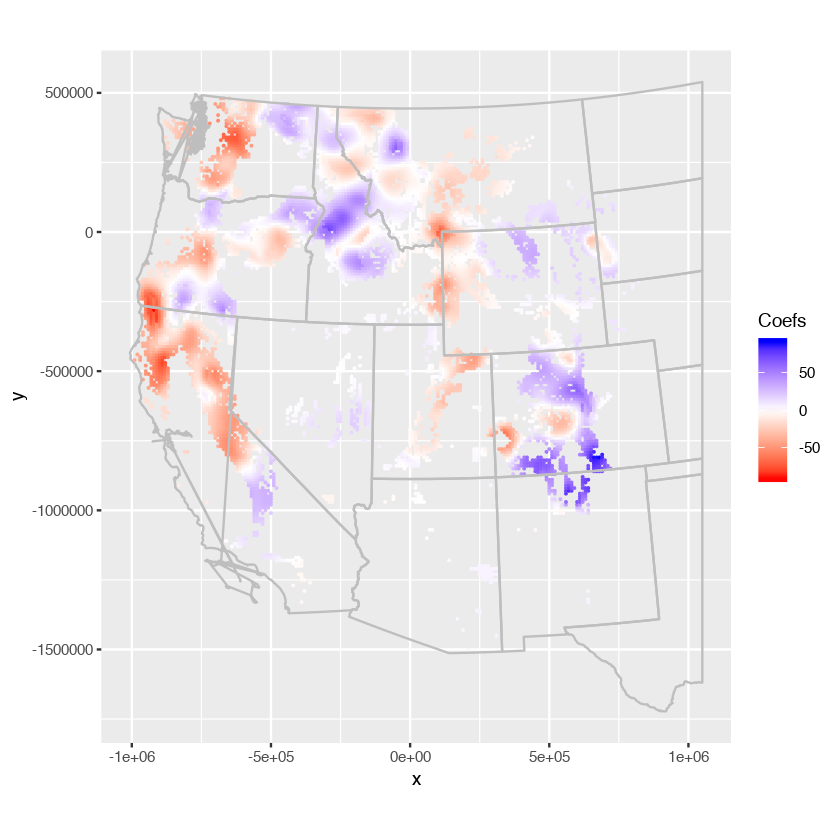

In [25]:
gwr.pt <- ggplot(data.gwr, aes(x=x,y=y))+geom_point(aes(colour=results$Tmean), size=0.05)+
  scale_colour_gradient2(low = "red", mid = "white", high = "blue", midpoint = 0, space = "rgb", 
                         na.value = "grey50", guide = "colourbar", guide_legend(title="Coefs"))
gwr.pt+geom_path(data=mpb10km_lines,aes(long, lat, group=id), colour="grey")+coord_equal()

Warning message:
“Non Lab interpolation is deprecated”

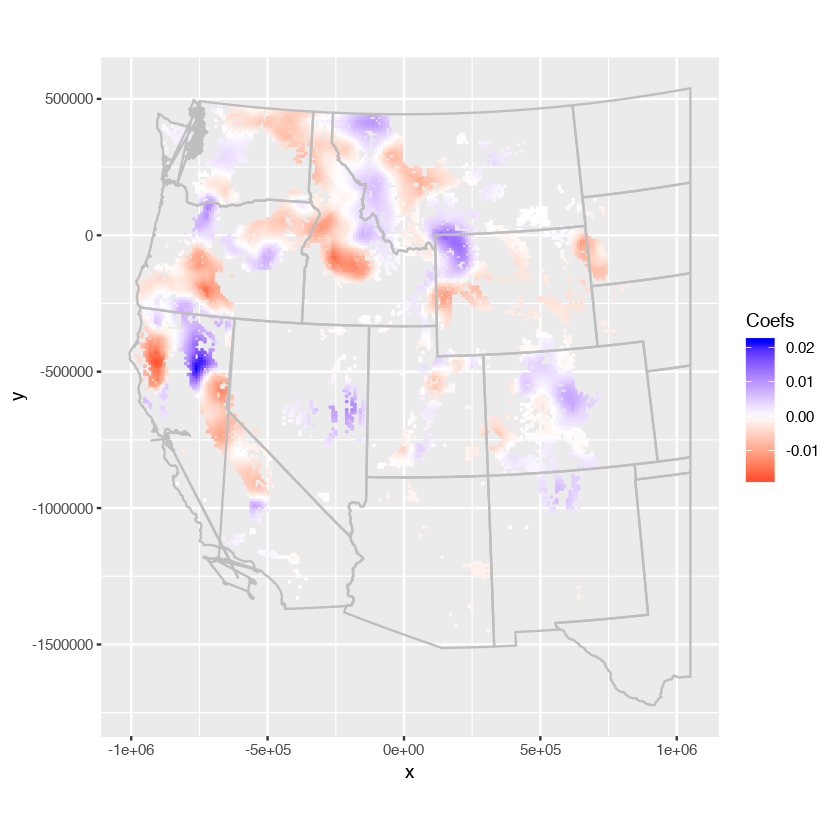

In [26]:
gwr.pt <- ggplot(data.gwr, aes(x=x,y=y))+geom_point(aes(colour=results$summerP0), size=0.05)+
  scale_colour_gradient2(low = "red", mid = "white", high = "blue", midpoint = 0, space = "rgb", 
                         na.value = "grey50", guide = "colourbar", guide_legend(title="Coefs"))
gwr.pt+geom_path(data=mpb10km_lines,aes(long, lat, group=id), colour="grey")+coord_equal()

In [27]:
plotvar <- fit$cluster
class <- classIntervals(plotvar, nclr, style="equal")
colcode <- findColours(class, plotclr)

Warning message in classIntervals(plotvar, nclr, style = "equal"):
“n same as number of different finite values\neach different finite value is a separate class”

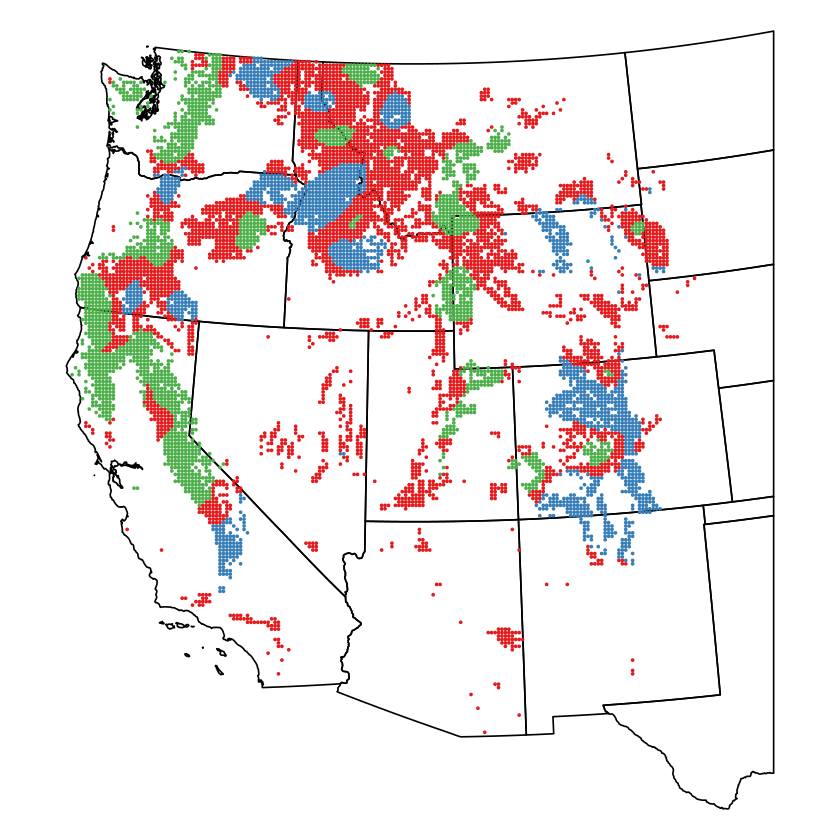

In [28]:
par(mfrow=c(1,1),mar=c(0,0,0,0))
plot(mpb10km_poly)
points(xy$x, xy$y, pch=16, col=colcode, cex=0.3)

In [53]:
vars <- sample(colnames(coeffs)[!(colnames(coeffs) %in% c('host', 'forest'))],16)
vars

[1] "Tvar"        "Tmean"       "minT"        "lon"         "MarMin"     
 [6] "wd"          "summerTmean" "vpd"         "maxAugT"     "PcumOctSep" 
[11] "maxT"        "JanTmin"     "density"     "Acs"         "vcc"        
[16] "GAP1"

In [31]:
coeffs.updated <- data.frame(coeffs, fit$cluster)

In [32]:
data.updated <- data.frame(data, fit$cluster)

In [33]:
head(coeffs.updated)

lon,lat,etopo1,host,forest,density,vcc,prs,GAP1,GAP3,⋯,maxT,Tmin,winterMin,summerTmean,Pmean,minT,JanMin,TOctSep,PcumOctSep,fit.cluster
-0.11903995,0.1354327,1.541748e-04,-0.06196741,0.032240067,-5.201852e-07,-0.005699180,0.0014235779,0.005168702,0.0069092228,⋯,0.05983144,-0.098265395,-0.25624641,0.040434780,-0.3016855,0.11504276,0.18862347,40.26040,0.01554744,3
-0.13630220,0.1425799,1.496557e-04,-0.06548325,0.034860643,-4.609842e-07,-0.005233793,0.0018511448,0.005832790,0.0055503518,⋯,0.06602539,-0.111642078,-0.31700073,-0.067002856,-0.3496395,0.17022389,0.19279609,42.25112,0.01821736,3
-0.15435076,0.1484172,1.749717e-04,-0.06768145,0.032341818,-8.869295e-07,-0.008465171,0.0018293771,0.010820713,-0.0012328176,⋯,0.08456335,-0.116735440,-0.28009271,0.067524643,-0.3870010,0.12213997,0.21071645,45.79198,0.02019163,3
-0.15090025,0.1447157,1.658476e-04,-0.06810684,0.033990680,-7.264692e-07,-0.007444900,0.0019367092,0.009497269,0.0003963406,⋯,0.08064444,-0.121305700,-0.31212317,0.005073964,-0.3889210,0.15581326,0.20747840,44.87748,0.02038107,3
0.04475106,0.2401097,7.961380e-05,0.01267380,0.003319291,-5.498453e-08,0.002026209,-0.0008959302,-0.014307195,0.0190948589,⋯,-0.02970856,0.011953519,0.08899551,-0.036673692,-0.4404473,-0.08814479,-0.05291292,43.13903,0.01866486,3
0.01362021,0.2247442,7.579213e-05,0.01440381,0.003150566,-1.363475e-07,0.001297780,-0.0007688417,-0.015698218,0.0182054270,⋯,-0.03782912,-0.003790708,0.09763471,-0.102374765,-0.4129432,-0.09252024,-0.06823957,41.94207,0.01766363,3


In [34]:
library(grid)

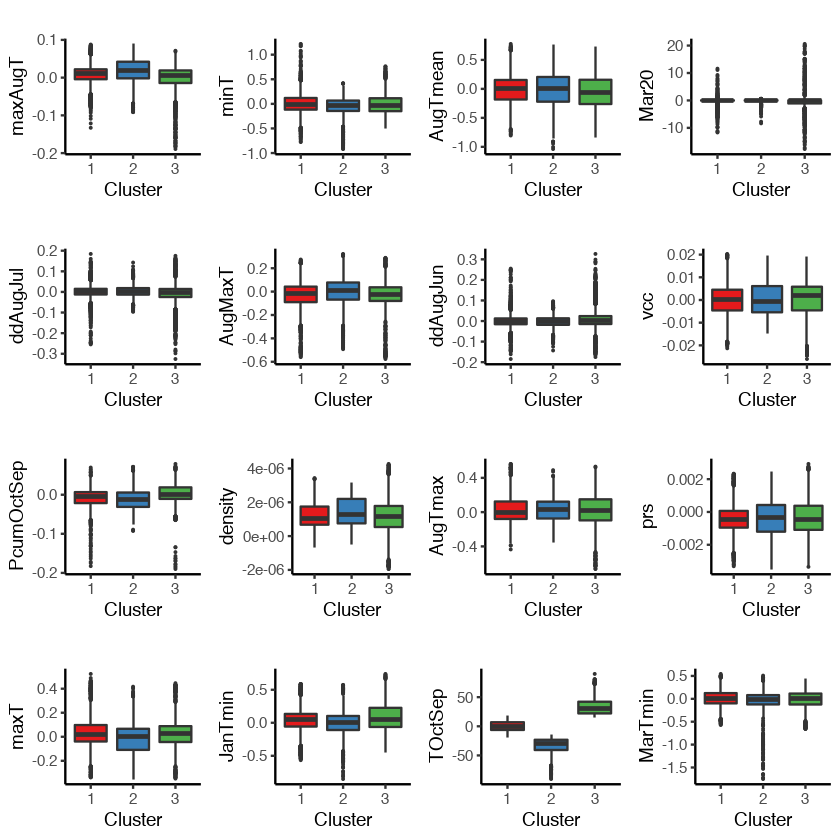

In [50]:
vplayout <- function(x, y) viewport(layout.pos.row = x, layout.pos.col = y)
n1 <- c(rep(1,4),rep(2,4),rep(3,4),rep(4,4)); n2 <- rep(c(1,2,3,4),4) 
grid.newpage()
pushViewport(viewport(layout = grid.layout(4, 4)))
for(var in vars){ #colnames(coeffs)
    sdf <- coeffs.updated[, c(var, 'fit.cluster')]
    colnames(sdf)[1] <- 'var'
    g <- ggplot(sdf, aes(x=as.factor(fit.cluster), y=var, fill=as.factor(fit.cluster)))+
      scale_fill_manual(values = plotclr) +
      geom_boxplot(outlier.size = 0.05)+labs(title='', x="Cluster", y = var)+
      theme_classic() + theme(legend.position="none") 
    i <- which(vars==var) #colnames(coeffs)
    print(g, vp = vplayout(n1[i], n2[i]))
}

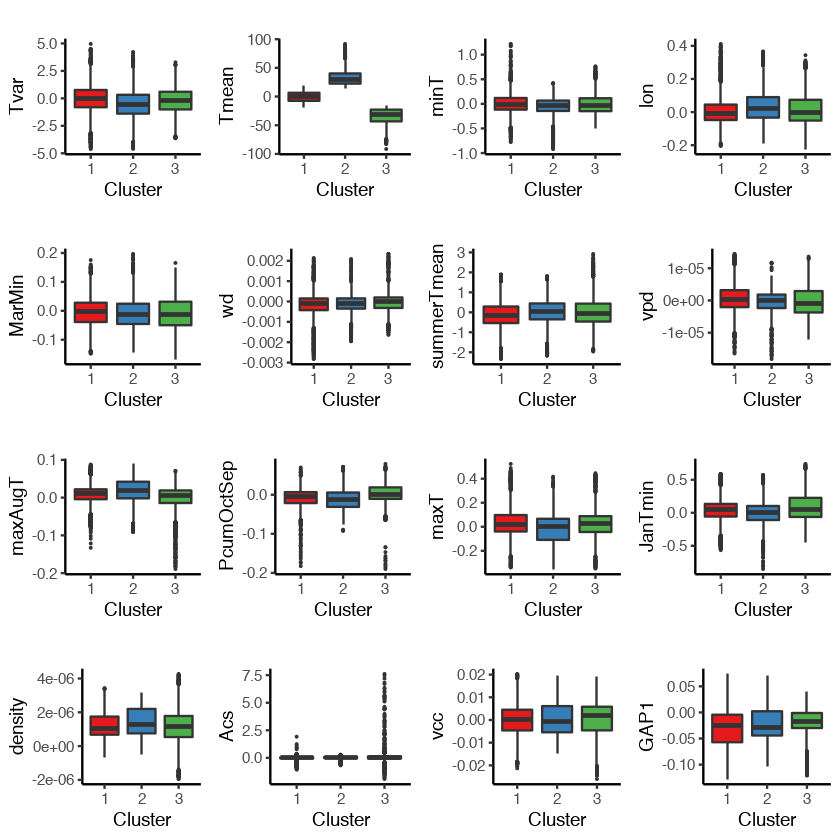

In [54]:
vplayout <- function(x, y) viewport(layout.pos.row = x, layout.pos.col = y)
n1 <- c(rep(1,4),rep(2,4),rep(3,4),rep(4,4)); n2 <- rep(c(1,2,3,4),4) 
grid.newpage()
pushViewport(viewport(layout = grid.layout(4, 4)))
for(var in vars){ #colnames(coeffs)
    sdf <- coeffs.updated[, c(var, 'fit.cluster')]
    colnames(sdf)[1] <- 'var'
    g <- ggplot(sdf, aes(x=as.factor(fit.cluster), y=var, fill=as.factor(fit.cluster)))+
      scale_fill_manual(values = plotclr) +
      geom_boxplot(outlier.size = 0.05)+labs(title='', x="Cluster", y = var)+
      theme_classic() + theme(legend.position="none") 
    i <- which(vars==var) #colnames(coeffs)
    print(g, vp = vplayout(n1[i], n2[i]))
}

In [74]:
spdf <- SpatialPointsDataFrame(data.gwr[,c("x", "y")], data.gwr)
#spdf$beetleAcres <- (spdf$beetleAcres)^0.05

In [75]:
localstats1 <- gwss(spdf, vars = c("beetleAcres", "mStdAge"), bw=500000)
head(data.frame(localstats1$SDF))

beetleAcres_LM,mStdAge_LM,beetleAcres_LSD,mStdAge_LSD,beetleAcres_LVar,mStdAge_LVar,beetleAcres_LSKe,mStdAge_LSKe,beetleAcres_LCV,mStdAge_LCV,Cov_beetleAcres.mStdAge,Corr_beetleAcres.mStdAge,Spearman_rho_beetleAcres.mStdAge,x,y,optional
191.1481,100.6004,473.4072,49.99307,224114.4,2499.307,6.744896,1.280415,2.476651,0.4969471,1008.2457,0.04255628,0.1612211,-990000,-460000,TRUE
198.3667,100.4704,493.6407,50.12435,243681.1,2512.450,6.556837,1.297154,2.488525,0.4988967,970.5130,0.03918333,0.1520479,-980000,-440000,TRUE
200.8600,100.5165,490.2160,49.90351,240311.8,2490.360,6.500783,1.302274,2.440585,0.4964706,1023.6050,0.04179984,0.1577063,-970000,-460000,TRUE
201.9140,100.4682,495.8820,49.98804,245899.0,2498.804,6.475848,1.304929,2.455907,0.4975511,999.3319,0.04027449,0.1539519,-970000,-450000,TRUE
236.1679,100.4243,598.6117,52.66263,358335.9,2773.353,5.466804,1.374200,2.534687,0.5244014,1329.9806,0.04214881,0.1110008,-970000,-240000,TRUE
237.5975,100.4237,601.7286,52.79552,362077.3,2787.366,5.426110,1.378045,2.532554,0.5257277,1374.8313,0.04323533,0.1103121,-970000,-230000,TRUE


In [66]:
quick.map <- function(spdf,var,legend.title,main.title) {
  x <- spdf@data[,var]
  cut.vals <- pretty(x)
  x.cut <- cut(x,cut.vals)
  cut.levels <- levels(x.cut)
  cut.band <- match(x.cut,cut.levels)
  colors <- brewer.pal(length(cut.levels),'Reds')
  par(mar=c(1,1,1,1))
  plot(mpb10km_poly,col='grey85')
  title(main.title)
  plot(spdf,add=TRUE,col=colors[cut.band],pch=16, cex=0.3)
  legend('bottomleft',cut.levels,col=colors,pch=16,bty='n',title=legend.title)
}

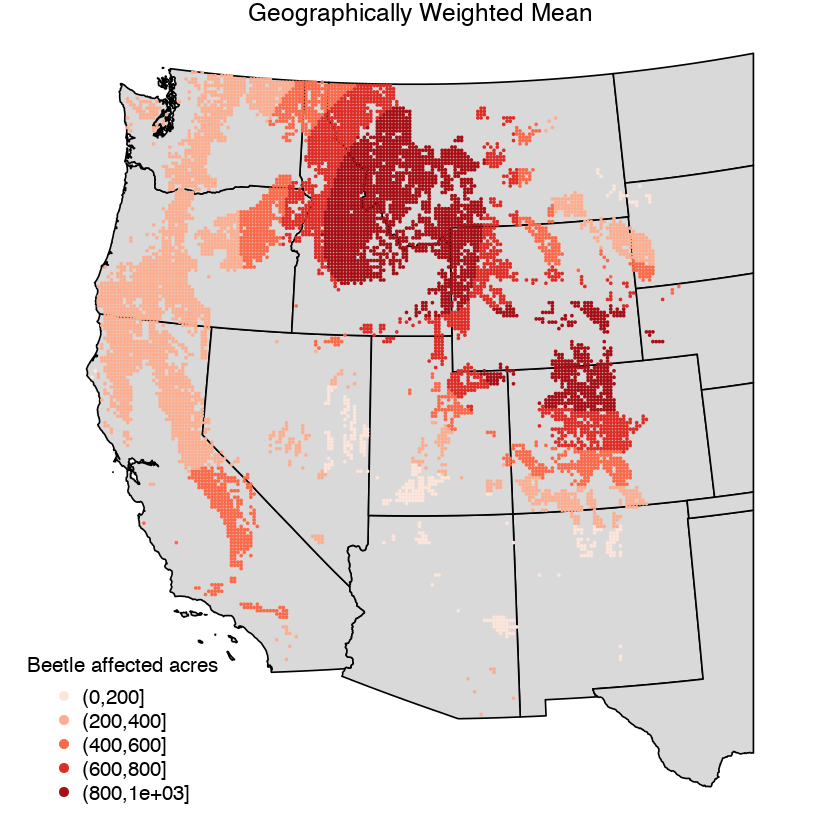

In [67]:
quick.map(localstats1$SDF,"beetleAcres_LM",
          "Beetle affected acres","Geographically Weighted Mean")

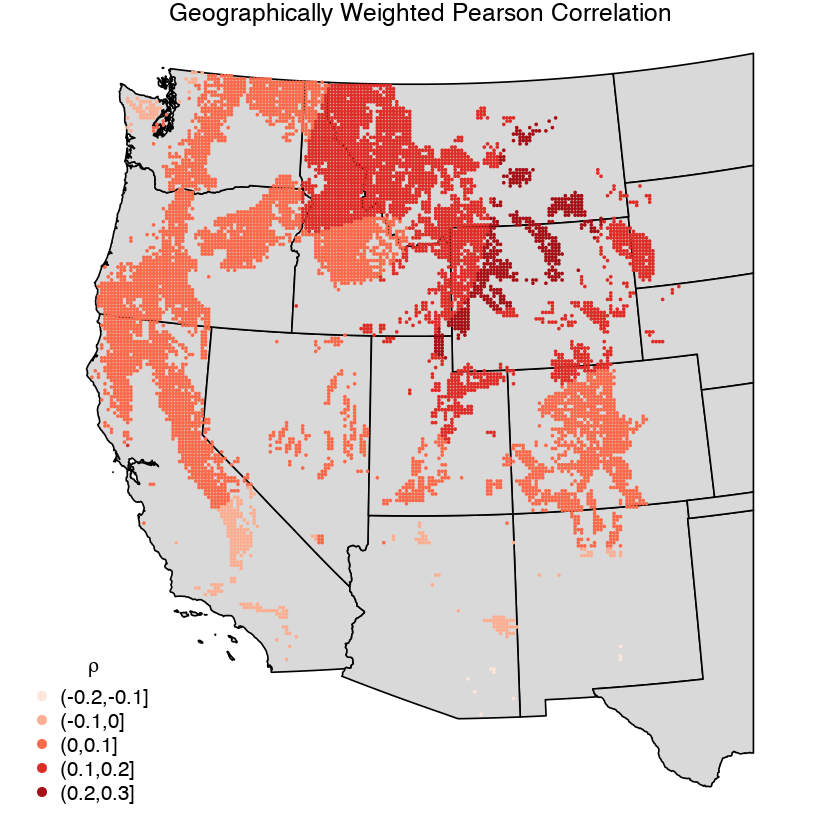

In [68]:
quick.map(localstats1$SDF,"Corr_beetleAcres.mStdAge",
          expression(rho),"Geographically Weighted Pearson Correlation")

In [79]:
gwr.res <- gwr.basic(beetleAcres~density, data=spdf, bw=500000, kernel = 'gaussian', adaptive=TRUE)
gwr.res

ERROR: Error in gwr.cv.contrib(bw, x, y, kernel, adaptive, dp.locat, p, theta, : argument "dMat" is missing, with no default


In [76]:
names(spdf)

[1] "lon"         "lat"         "etopo1"      "beetleAcres" "host"       
 [6] "forest"      "mStdAge"     "density"     "vcc"         "mfri"       
[11] "prs"         "pms"         "pls"         "GAP1"        "GAP2"       
[16] "GAP3"        "vpd"         "cwd"         "maxAugT"     "summerP0"   
[21] "Tmean"       "mi"          "Tvar"        "wd"          "AugTmean"   
[26] "OctTmin"     "AugMaxT"     "AugTmax"     "Acs"         "MarMin"     
[31] "ddAugJun"    "ddAugJul"    "JanTmin"     "PPT"         "summerP2"   
[36] "TMarAug"     "Mar20"       "fallTmean"   "MarTmin"     "maxT"       
[41] "Tmin"        "winterMin"   "summerTmean" "Pmean"       "minT"       
[46] "JanMin"      "TOctSep"     "Jan20"       "PcumOctSep"  "x"          
[51] "y"